# HW1
## TODO:  Your ID goes here:

#### TODO: You emails for here:
tzursha@post.bgu.ac.il,
barzil@post.bgu.ac.il

## Introduction
This is the first Deep Learning assignment of the course.
It is divided into three sections:
1. Toy classification tasks (50 pts.)
2. Toy regressions tasks (30 pts.)
3. MNIST (binary) classification task (20 pts.)

See the instructions before each section.
You are not required to normalize the data in sections 1 and 2.

## Submission
The deadline for the task is 12.12.2024 end of day.
You may work in teams of 2 or 3.

Submission is via Moodle. Submit the **already run** notebook (i.e., with its output, figures, etc.,).

#Section 1: Classification Tasks
## TODO
For the entire section, do the following (i.e., only once):
1. Write a training function that returns the trained model and training loss
2. Write a plotting function to plot the training loss
3. Write a plotting function that scatter plots the predicted labels and decision boundaries.
4. Write a preprocessing function to handle the data (convert to pytorch tensor, etc).
5. Write an evaluation function that prints the set accuracy (train/test)

For each of the 5 exercises, do the following:
1. Create either a linear classifier if the problem seems linearly separable or an MLP using PyTorch. Explain your choice.
2. Train the model and plot the loss across epochs.
3. Plot the predicted labels and decision boundaries for the train set. Show the accuracy in the title (up to 3 decimals points).
4. Plot the predicted labels and decision boundaries for the test set.  Show the accuracy in the title (up to 3 decimals points).
5. Do NOT change the random seed of the data generation functions.
6. Create a Markdown cell and explain briefly (2-3 lines): why did the model perform well/poorly? What affected your design choices? What did you learn from previous attempts?


EX5 has further instructions.

## Grading:
**Accuracy** computed on the test set:
1. 80-100%: 10 pts (full grade)
2. 70-80%: 8pts
3. 60-70%: 6pts
4. < 60%: 5pts

You will also be graded on the correctness of your code and the discussion that follows each excersice.



## Setup
## DO NOT MODIFY THESE FUNCTIONS

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

In [36]:
### EX1
def random_points_in_triangle(v1, v2, v3, n_points):
    points = []
    for _ in range(n_points):
        r1, r2 = np.random.rand(2)
        sqrt_r1 = np.sqrt(r1)
        point = (1 - sqrt_r1) * v1 + sqrt_r1 * (1 - r2) * v2 + sqrt_r1 * r2 * v3
        points.append(point)
    return np.array(points)

def generate_symmetric_triangles_data(K=3, N=100, random_state=42):
    np.random.seed(random_state)
    # Define vertices for three symmetric triangles
    side_length = 2
    height = np.sqrt(3) * side_length / 2
    triangles = [
        (np.array([0, 0]), np.array([side_length, 0]), np.array([side_length / 2, height])),
        (np.array([0, 0]), np.array([-side_length, 0]), np.array([-side_length / 2, height])),
        (np.array([0, 0]), np.array([1.5, -height]), np.array([-1.5, -height]))
    ]

    X, y = [], []
    for i, (v1, v2, v3) in enumerate(triangles):
        points = random_points_in_triangle(v1, v2, v3, N)
        X.append(points)
        y += [i] * N

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX2
def generate_grid_data(grid_size=4, min_points=5, max_points=20, random_state=42):
    np.random.seed(random_state)
    X, y = [], []
    half_grid_size = grid_size // 2

    for i in range(grid_size):
        for j in range(grid_size):
            n_points = np.random.randint(min_points, max_points + 1)
            x_offset = i - half_grid_size + 0.5
            y_offset = j - half_grid_size + 0.5
            # Generate points more centered within the square
            points = 0.8 * (np.random.rand(n_points, 2) - 0.5) + [x_offset, y_offset]
            X.append(points)
            label = (i + j) % 2
            y += [label] * n_points

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX3
def generate_concentric_circles_data(radii=[1, 2, 3, 4], points_per_circle=100, random_state=42):
    np.random.seed(random_state)
    X, y = [], []

    for i, radius in enumerate(radii):
        angles = np.linspace(0, 2 * np.pi, points_per_circle, endpoint=False)
        circle_x = radius * np.cos(angles) + np.random.normal(0, 0.1, points_per_circle)
        circle_y = radius * np.sin(angles) + np.random.normal(0, 0.1, points_per_circle)
        X.append(np.vstack((circle_x, circle_y)).T)
        y += [i] * points_per_circle

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX4
def generate_nested_rectangles_data(inner_rect=(2, 1), middle_rect=(4, 2), outer_rect=(6, 3), points_per_rectangle=100, random_state=42):
    np.random.seed(random_state)
    X, y = [], []

    # Inner rectangle
    width, height = inner_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    X.append(np.vstack((x_points, y_points)).T)
    y += [0] * points_per_rectangle

    # Middle rectangle
    width, height = middle_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    # Exclude points that fall inside the inner rectangle
    mask = (np.abs(x_points) > inner_rect[0] / 2) | (np.abs(y_points) > inner_rect[1] / 2)
    X.append(np.vstack((x_points[mask], y_points[mask])).T)
    y += [1] * len(x_points[mask])

    # Outer rectangle
    width, height = outer_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    # Exclude points that fall inside the middle rectangle
    mask = (np.abs(x_points) > middle_rect[0] / 2) | (np.abs(y_points) > middle_rect[1] / 2)
    X.append(np.vstack((x_points[mask], y_points[mask])).T)
    y += [2] * len(x_points[mask])

    X = np.vstack(X)
    y = np.array(y)
    return X, y

def plot_data(X, y, title=""):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=set(y), title="Classes")
    plt.show()

# TODO - your general functions for Section 1

In [37]:
### Your code goes here (you may break this part to more than one cell) ####
### Imports

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

### Preprocessing function ####

def preprocessing(X_train, y_train, X_test, y_test, hidden_size=16, model_name = "NLL"):

  device = "cpu"

  X_train_tensor = torch.tensor(X_train, dtype=torch.float).to(device)
  y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
  X_test_tensor = torch.tensor(X_test, dtype=torch.float).to(device)
  y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

  input_size = X_train.shape[1]
  output_size = len(np.unique(y_train))

  if (model_name == "NLL"):
    criterion = nn.NLLLoss()
    model = MLP_Classifier(input_size, hidden_size, output_size).to(device)
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

  elif (model_name == "CrossEntropy"):
    criterion = nn.CrossEntropyLoss()
    model = nn.Sequential(nn.Linear(input_size, output_size), nn.LogSoftmax(dim=1)).to(device)
    optimizer = optim.SGD(model.parameters(), lr=1, weight_decay=0.001)

  return X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, model, optimizer, criterion

### Training function ###

class MLP_Classifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):

        super(MLP_Classifier, self).__init__()
        self.input = nn.Linear(input_size, hidden_size)
        self.hidden1 = nn.Linear(hidden_size, hidden_size)
        self.hidden2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):

      x = self.input(x)
      x = F.relu(x)
      x = self.hidden1(x)
      x = F.relu(x)
      x = self.hidden2(x)
      output = F.log_softmax(x, dim=1)
      return output

def train_model(model, inputs, labels, optimizer, criterion, num_epochs=100):

  model.train()
  epoch_loss_list = []

  for epoch in range(num_epochs):

    # Clears the gradients from the previous epoch to avoid accumulation.
    optimizer.zero_grad()

    # Feeds the input data through the model to get predictions.
    outputs = model(inputs).squeeze()

    # Computes the loss value by comparing the model's predictions (outputs) to the true labels (labels) using the specified criterion.
    loss = criterion(outputs, labels)

    # Computes the gradients of the loss with respect to the model's parameters via backpropagation.
    loss.backward()

    # Updates the model's parameters based on the gradients using the optimizer
    optimizer.step()

    epoch_loss_list.append(loss.item())

  return model, epoch_loss_list

### Plot training loss function ###

def plot_training_loss(epoch_loss_list):

  plt.plot(epoch_loss_list)
  plt.grid()
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Training Loss")
  plt.show()

### Plot predicted labels and decision boundaries ###

def plot_decision_boundary(X, y, model, title, axis_lim = (-2, 2)):

  device = "cpu"
  X_tensor= torch.Tensor(X).to(device)
  y_tensor= torch.Tensor(y).to(device)

  x_min = X_tensor[:, 0].min() - 1
  x_max = X_tensor[:, 0].max() + 1
  y_min = X_tensor[:, 1].min() - 1
  y_max = X_tensor[:, 1].max() + 1
  xs = torch.linspace(x_min, x_max, steps=500)
  ys = torch.linspace(y_min, y_max, steps=500)
  xm, ym = torch.meshgrid(xs, ys, indexing='xy')
  xr, yr = xm.ravel(), ym.ravel()
  xy = torch.stack([xr, yr], dim=1)
  xm, ym = xm.numpy(), ym.numpy()

  y_pred = model(X_tensor).detach().cpu().numpy()
  y_pred = np.argmax(y_pred, axis=1)

  decision_bound = model(xy.to(device)).detach().cpu().numpy()
  decision_bound = np.argmax(decision_bound, axis=1)

  plt.scatter(xm, ym, c=decision_bound, cmap=plt.cm.Spectral)
  plt.scatter(X_tensor[:, 0], X_tensor[:, 1], c=y_pred, s=40, cmap=plt.cm.Spectral, edgecolors='black')
  plt.xlim(axis_lim)
  plt.ylim(axis_lim)
  plt.title(title)
  plt.show()

### Evaluation function ###

def evaluation(X_train_tensor, X_test_tensor, model):

  model.eval() # Disables behaviors like dropout or batch normalization updates that are specific to training.

  with torch.no_grad(): # Speeds up computation and reduces memory usage since gradients are not needed during evaluation.

    # Passes the training data (X_train_tensor) through the model to compute predictions.
    # torch.argmax selects the index of the maximum value in the output along dimension 1 (class probabilities). This corresponds to the predicted class for each data point.
    train_pred = torch.argmax(model(X_train_tensor), dim=1)

    # Passes the test data (X_test_tensor) through the model to compute predictions.
    # Similarly, selects the predicted class for each test sample.
    test_pred = torch.argmax(model(X_test_tensor), dim=1)

  train_accruacy = accuracy_score(y_train_tensor.cpu(), train_pred.cpu())
  test_accruacy = accuracy_score(y_test_tensor.cpu(), test_pred.cpu())

  return train_accruacy, test_accruacy

## EX1

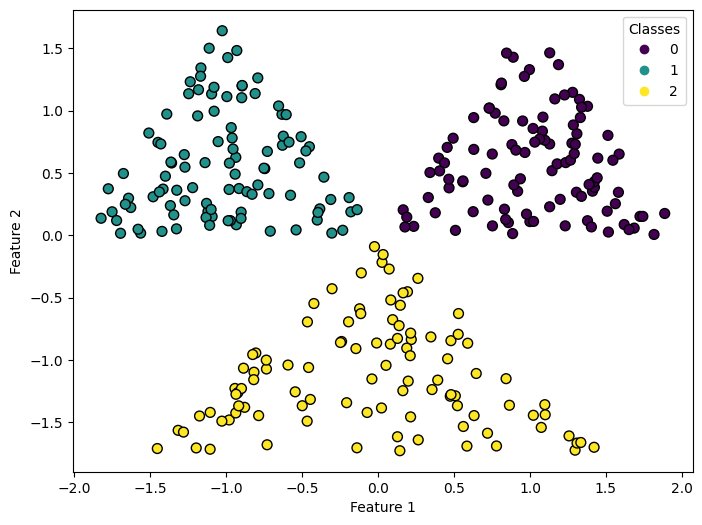

In [38]:
# Generate the data
X_train, y_train = generate_symmetric_triangles_data(random_state=0)
X_test, y_test = generate_symmetric_triangles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

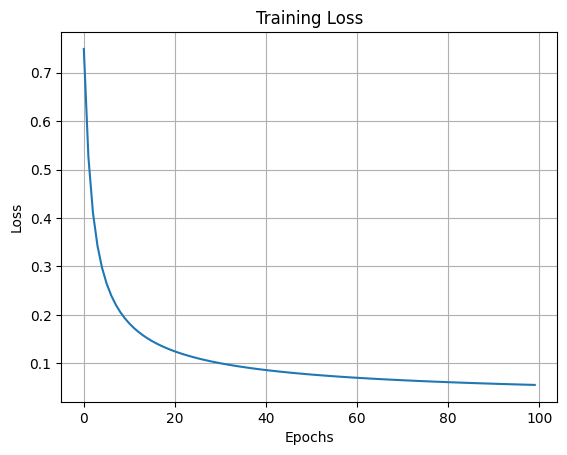

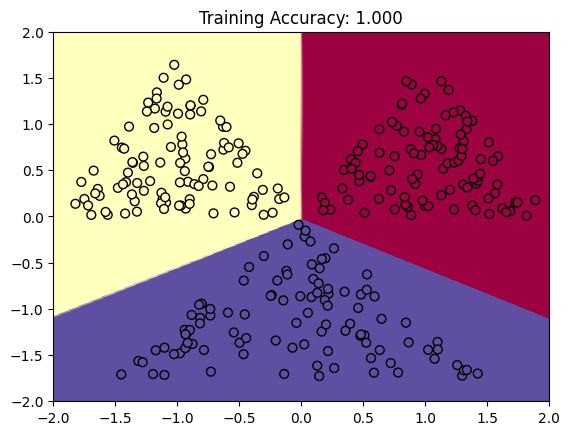

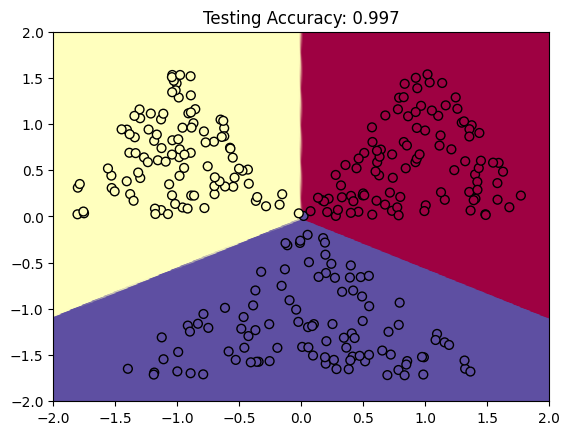

In [39]:
### Your code goes here ####

X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, model, optimizer, criterion = preprocessing(X_train, y_train, X_test, y_test, hidden_size=16, model_name = "CrossEntropy")

model, epoch_loss_list = train_model(model, X_train_tensor, y_train_tensor, optimizer, criterion, num_epochs = 100)
plot_training_loss(epoch_loss_list)
train_accruacy, test_accruacy = evaluation(X_train_tensor, X_test_tensor, model)

plot_decision_boundary(X_train, y_train, model, f"Training Accuracy: {train_accruacy:.3f}")
plot_decision_boundary(X_test, y_test, model, f"Testing Accuracy: {test_accruacy:.3f}")

In [40]:
# Brief explanation :
# We observe that the problem is straightforward, as the points can be clearly
# divided into three distinct groups. Therefore, a linear model with
# cross-entropy loss is suitable for addressing this problem.
# We notice that the points are divided into three distinct groups,
# which is why we use only 16 neurons in each layer—a relatively small number.
# Similarly, the number of epochs is kept low,
# yet this is sufficient to achieve very high accuracy

## EX2

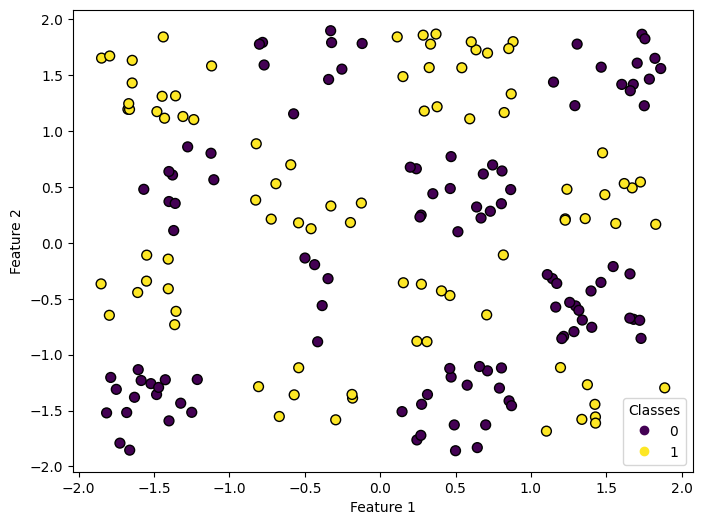

In [41]:
# Generate the data
X_train, y_train = generate_grid_data(random_state=0)
X_test, y_test = generate_grid_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

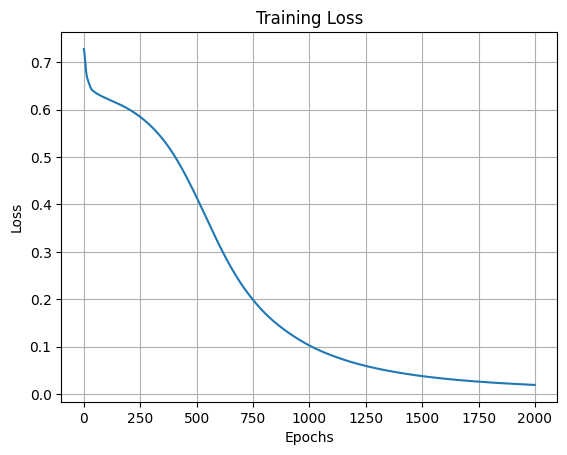

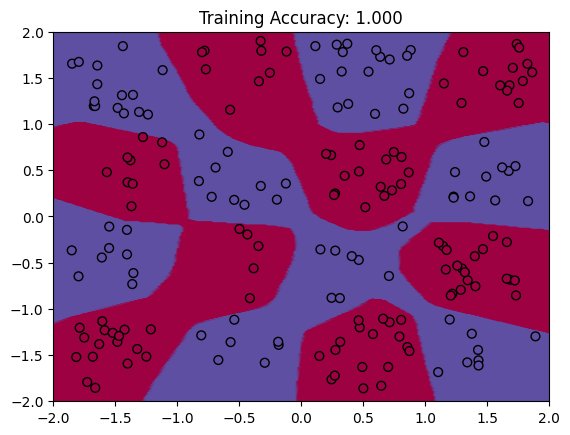

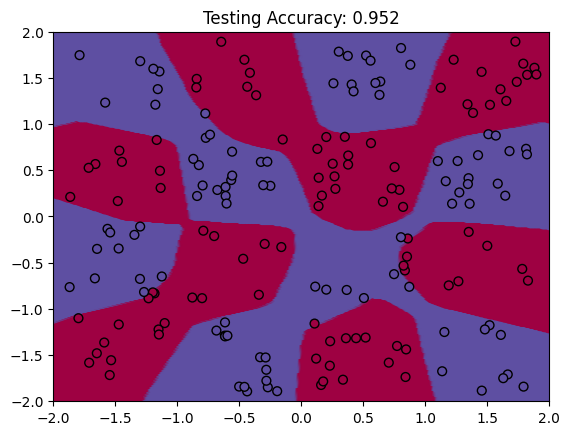

In [42]:
### Your code goes here ####

X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, model, optimizer, criterion = preprocessing(X_train, y_train, X_test, y_test, hidden_size = 64, model_name = "NLL")
model, epoch_loss_list = train_model(model, X_train_tensor, y_train_tensor, optimizer, criterion, num_epochs = 2000)
plot_training_loss(epoch_loss_list)
train_accruacy, test_accruacy = evaluation(X_train_tensor, X_test_tensor, model)

plot_decision_boundary(X_train, y_train, model, f"Training Accuracy: {train_accruacy:.3f}")
plot_decision_boundary(X_test, y_test, model, f"Testing Accuracy: {test_accruacy:.3f}")

In [43]:
# Brief explanation :
# We chose MLP because the problem is not linear but rather a classification task,
# where each point is assigned to its respective class based on the distribution.
# We noticed that the points are divided into only two groups,
# but they cluster in various regions across the graph.
# As a result, we increased the number of neurons in each layer to achieve more flexible shapes,
# thereby improving accuracy.
# Consequently, the number of epochs was also increased.

## EX3

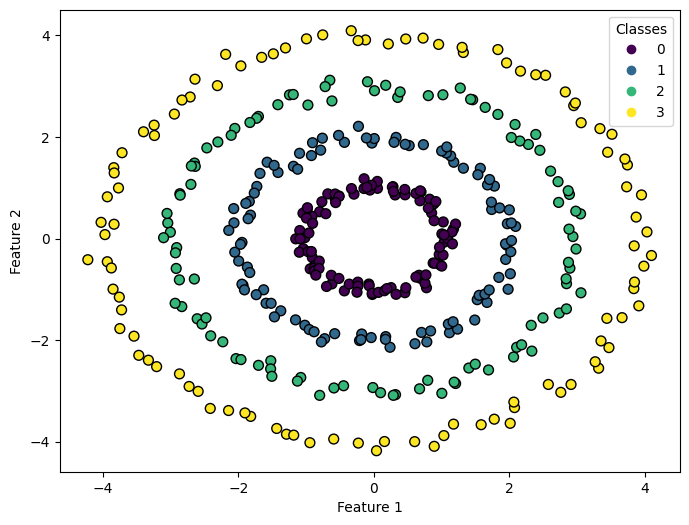

In [44]:
# Generate the data
X_train, y_train = generate_concentric_circles_data(random_state=0)
X_test, y_test = generate_concentric_circles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

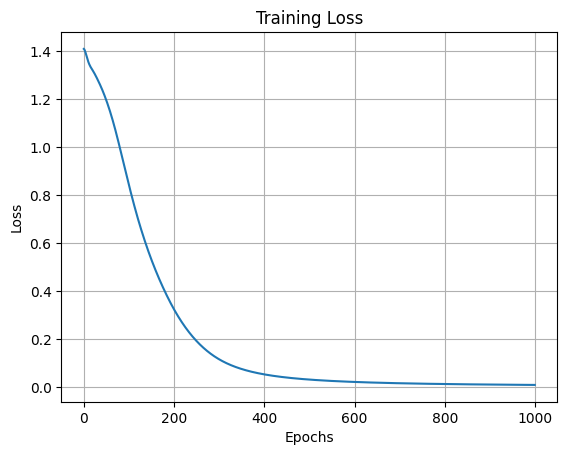

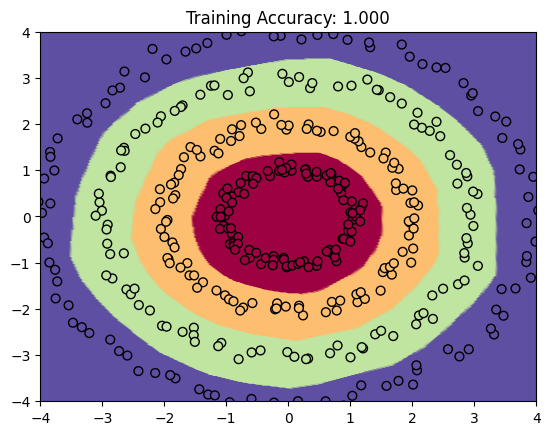

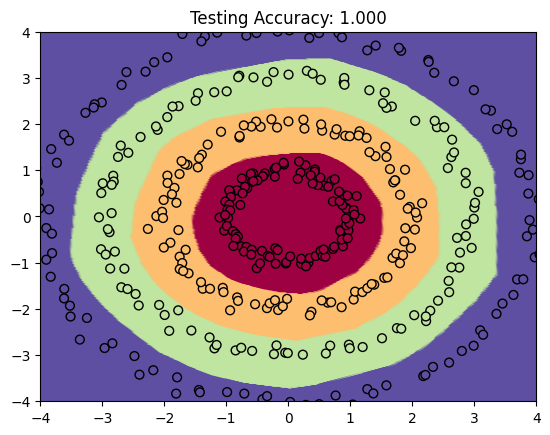

In [45]:
### Your code goes here ####

X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, model, optimizer, criterion = preprocessing(X_train, y_train, X_test, y_test, hidden_size = 32, model_name = "NLL")
model, epoch_loss_list = train_model(model, X_train_tensor, y_train_tensor, optimizer, criterion, num_epochs = 1000)
plot_training_loss(epoch_loss_list)
train_accruacy, test_accruacy = evaluation(X_train_tensor, X_test_tensor, model)

plot_decision_boundary(X_train, y_train, model, f"Training Accuracy: {train_accruacy:.3f}", (-4, 4))
plot_decision_boundary(X_test, y_test, model, f"Testing Accuracy: {test_accruacy:.3f}", (-4, 4))

In [46]:
# Brief explanation :
# We chose MLP because the problem is not linear but rather a classification task,
# where each point is assigned to its respective class based on the distribution.
# We observe that the points belong to four distinct groups,
# but their locations are evenly distributed, which simplifies the task.
# This allows us to use simpler shapes,
# reducing the number of neurons in each layer as well as the number of epochs required.

## EX4

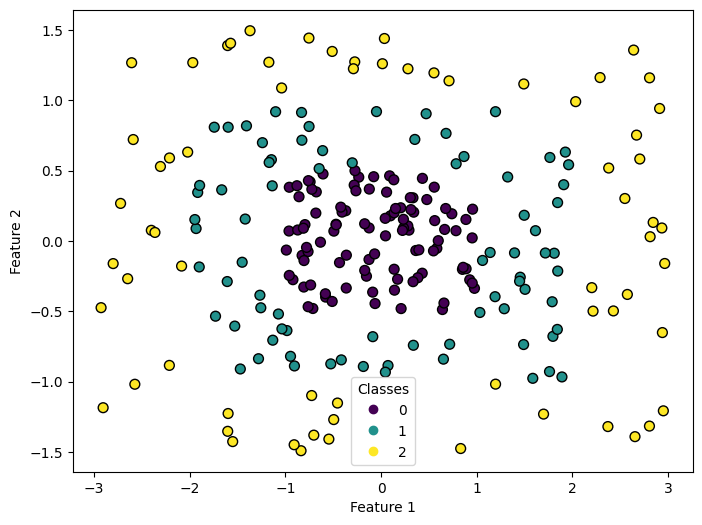

In [47]:
# Generate the data
X_train, y_train = generate_nested_rectangles_data(random_state=0)
X_test, y_test = generate_nested_rectangles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

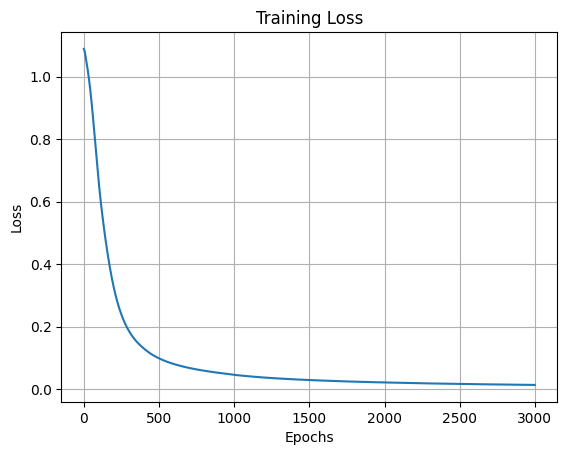

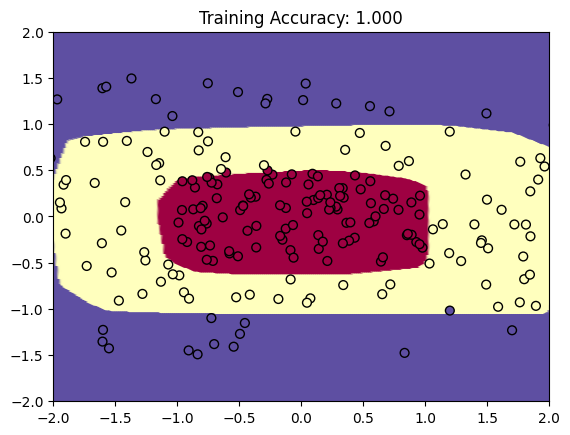

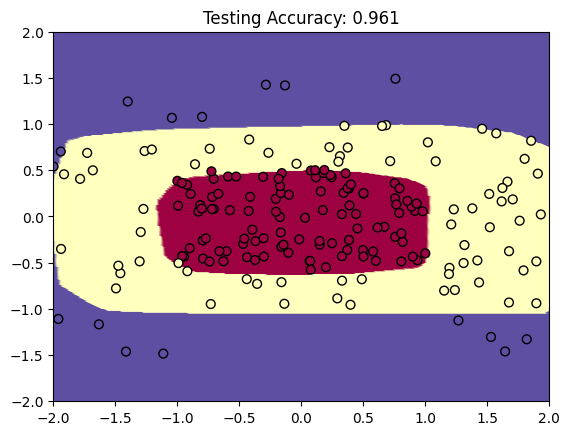

In [48]:
### Your code goes here ####

X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, model, optimizer, criterion = preprocessing(X_train, y_train, X_test, y_test, hidden_size = 32, model_name = "NLL")
model, epoch_loss_list = train_model(model, X_train_tensor, y_train_tensor, optimizer, criterion, num_epochs = 3000)
plot_training_loss(epoch_loss_list)
train_accruacy, test_accruacy = evaluation(X_train_tensor, X_test_tensor, model)

plot_decision_boundary(X_train, y_train, model, f"Training Accuracy: {train_accruacy:.3f}")
plot_decision_boundary(X_test, y_test, model, f"Testing Accuracy: {test_accruacy:.3f}")

In [49]:
# Brief explanation :
# We chose MLP because the problem is not linear but rather a classification task,
# where each point is assigned to its respective class based on the distribution.
# This exercise is similar to the previous one,
# but here, there are no clear boundaries between the groups of points.
# Therefore, we increase the number of epochs to achieve better accuracy.

## EX5 - Mystery Dataset
Load the data from the ex5.zip file:
X_train.npy
y_train.npy
X_test.npy
y_test.npy

Figure out the input and output dims and perform the classification task as in previous exercises.

You do not have to plot the data, but you may if you see fit.

Data dimensions: 5
Training Accuracy: 1.000
Testing Accuracy: 0.980



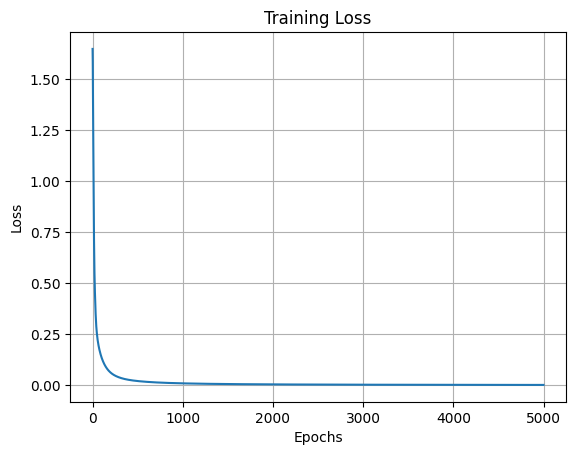

In [51]:
### Your code goes here ####

## load numpy array using np.load()

## Figure out the data dimensions

## Init and train model. Report Accuracy

X_train, y_train = np.load("/content/X_train.npy"), np.load("/content/y_train.npy")
X_test, y_test = np.load("/content/X_test.npy"), np.load("/content/y_test.npy")

X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, model, optimizer, criterion = preprocessing(X_train, y_train, X_test, y_test, hidden_size = 64, model_name = "NLL")
model, epoch_loss_list = train_model(model, X_train_tensor, y_train_tensor, optimizer, criterion, num_epochs = 5000)
train_accruacy, test_accruacy = evaluation(X_train_tensor, X_test_tensor, model)

print(f"Data dimensions: {X_train.shape[1]}")
print(f"Training Accuracy: {train_accruacy:.3f}")
print(f"Testing Accuracy: {test_accruacy:.3f}\n")

plot_training_loss(epoch_loss_list)

In [52]:
# Brief explanation :
# We chose MLP because the problem is not linear but rather a classification task,
# where each point is assigned to its respective class based on the distribution.
# Now the problem involves five different dimensions,
# which requires us to significantly increase the number of neurons in each layer to achieve good accuracy,
# as well as the number of epochs.

#Section 2: Regression Tasks
In this section your task is to predict the value of each point (indicated by the color in the scatter plots) using it's coordinates.
## TODO
For the entire section, do the following (i.e., only once):
1. Use the training function from previous section.
2. Use the plotting function from previous section to plot the loss.
3. Use the provided plotting function to plot the data with your predicted label values. For instance:


```
plot_s_curve(X_train, y_train_pred)
```


4. Write a preprocessing function for the inputs (convert to torch tensor, etc).
5. Write an evaluation function that prints the set Mean Square Error (train/test).

For each of the 3 exercises, do the following:
1. Create an MLP using PyTorch.
2. Train the model and plot the loss across epochs.
3. Plot the predicted values for the train set. Show the MSE in the title (up to 3 decimals points).
4. Plot the predicted values for the test set. Show the MSE in the title (up to 3 decimals points).
5. Create a Markdown cell and explain briefly (2-3 lines): why did the model perform well/poorly? What affected your design choices?

**Grading**: in this section you are only graded on the correctness of your code and discussion.

**Optional**: you may want to plot the residuals between your model prediction and the true labels. For instance, you may plot the data and use the differences between the true and predicted labels as their color.

## Setup

In [53]:
from sklearn.datasets import make_s_curve

### EX7
def generate_s_curve_data(n_samples=150, random_state=42):
    X, t = make_s_curve(n_samples, random_state=random_state)
    X = X[:, [0, 2]]  # Use only 2D input (X[:, 0] and X[:, 2])
    return X, t

def create_labels_s_curve(X, t):
    # Sort the indices based on the S-curve parameter t
    sorted_indices = np.argsort(t)
    labels = np.linspace(-1, 1, len(t))
    y = np.zeros_like(t)
    y[sorted_indices] = labels
    return y

def plot_s_curve(X, y, title='S-Curve'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter, label='Label')
    plt.show()

### EX8
def generate_spiral_data(n_points=1000, n_turns=2.5, noise=0.05, random_state=42):
    np.random.seed(random_state)
    theta = np.linspace(0, n_turns * 2 * np.pi, n_points)
    r = np.linspace(0, 1, n_points)
    x = r * np.cos(theta) + noise * np.random.randn(n_points)
    y = r * np.sin(theta) + noise * np.random.randn(n_points)
    X = np.vstack((x, y)).T
    return X, theta

def create_labels_spiral(theta):
    labels = np.linspace(-1, 1, len(theta))
    return labels

def plot_spiral(X, y, title='Spiral'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter, label='Label')
    plt.show()

### EX9
def generate_spiral_data_3d(n_points=1000, n_turns=2.5, noise=0.05, random_state=42):
    np.random.seed(random_state)
    theta = np.linspace(0, n_turns * 2 * np.pi, n_points)
    z = np.linspace(0, 1, n_points)
    r = z
    x = r * np.cos(theta) + noise * np.random.randn(n_points)
    y = r * np.sin(theta) + noise * np.random.randn(n_points)
    X = np.vstack((x, y, z)).T
    return X, theta

def create_labels_3d_spiral(theta):
    labels = np.linspace(-1, 1, len(theta))
    return labels

def plot_spiral_3d(X, y, title='3D Spiral'):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolor='k')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(title)
    fig.colorbar(scatter, ax=ax, label='Label')
    plt.show()

## TODO - You general functions for Section 2

In [54]:
### Your code goes here ###
### Imports

from sklearn.metrics import mean_squared_error

### Preprocessing function ####

def preprocessing(X_train, y_train, X_test, y_test, hidden_size=16):

  device = "cpu"

  X_train_tensor = torch.tensor(X_train, dtype=torch.float).to(device)
  y_train_tensor = torch.tensor(y_train, dtype=torch.float).to(device)
  X_test_tensor = torch.tensor(X_test, dtype=torch.float).to(device)
  y_test_tensor = torch.tensor(y_test, dtype=torch.float).to(device)

  input_size = X_train.shape[1]
  output_size = 1

  criterion = nn.MSELoss()
  model = MLP_Classifier(input_size, hidden_size, output_size).to(device)
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

  return X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, model, optimizer, criterion

class MLP_Classifier(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):

      super(MLP_Classifier, self).__init__()
      self.input = nn.Linear(input_size, hidden_size)
      self.hidden1 = nn.Linear(hidden_size, hidden_size)
      self.hidden2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):

    x = self.input(x)
    x = F.relu(x)
    x = self.hidden1(x)
    x = F.relu(x)
    x = self.hidden2(x)
    return x

### Evaluation function ###

def evaluation(X_train_tensor, X_test_tensor, model):

  model.eval()

  with torch.no_grad():
    train_pred = model(X_train_tensor).cpu().numpy()
    test_pred = model(X_test_tensor).cpu().numpy()

  train_rmse = np.sqrt(mean_squared_error(y_train_tensor.cpu(), train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test_tensor.cpu(), test_pred))

  return train_rmse, test_rmse, train_pred, test_pred

### Additional plotting functions ###

def plot_comparison(shape, X_train, y_train, X_test, y_test, train_pred, test_pred):
  shape(X_train, y_train, "train set with labels")
  shape(X_train, train_pred, "train set with predicted values")
  shape(X_test, y_test, "test set with labels")
  shape(X_test, test_pred, "test set with predicted values")

## EX6

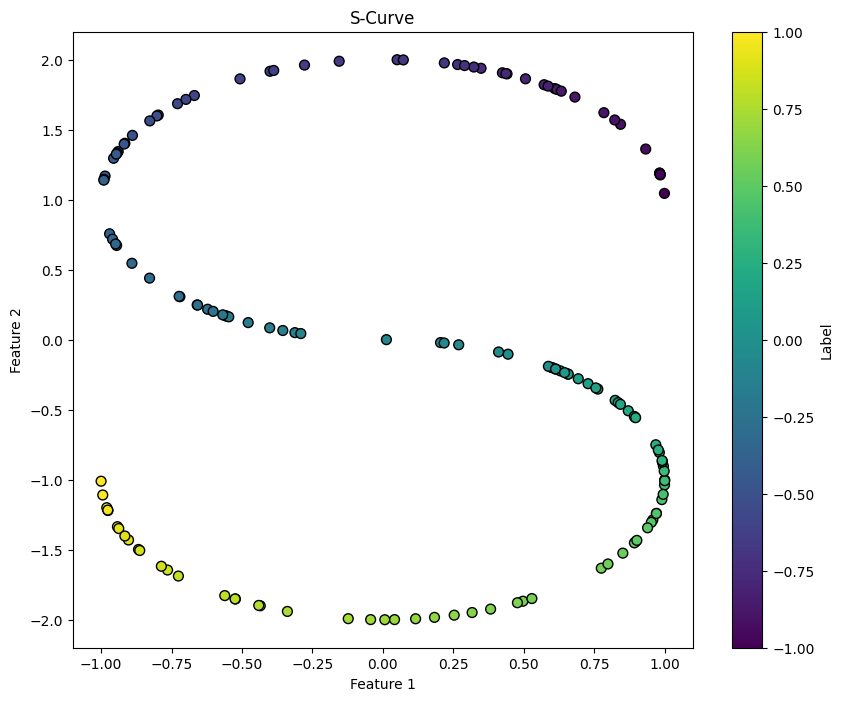

In [55]:
# Generate the data
X_train, theta_train = generate_s_curve_data(random_state=0)
X_test, theta_test = generate_s_curve_data(random_state=1)

# Create the labels
y_train = create_labels_s_curve(X_train, theta_train)
y_test = create_labels_s_curve(X_test, theta_test)

# Plot the data
plot_s_curve(X_train, y_train)

MSE (train set) : 0.043
MSE (test set) : 0.108



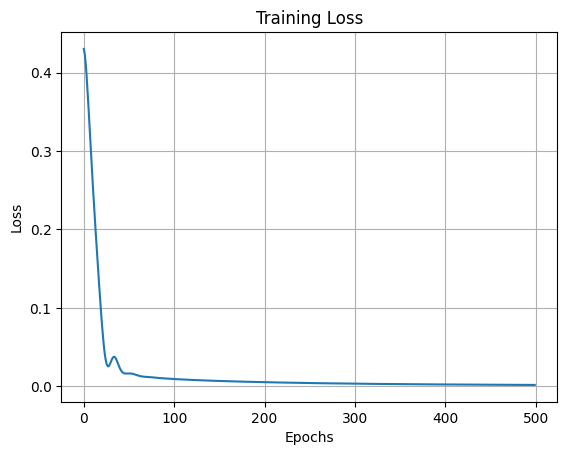

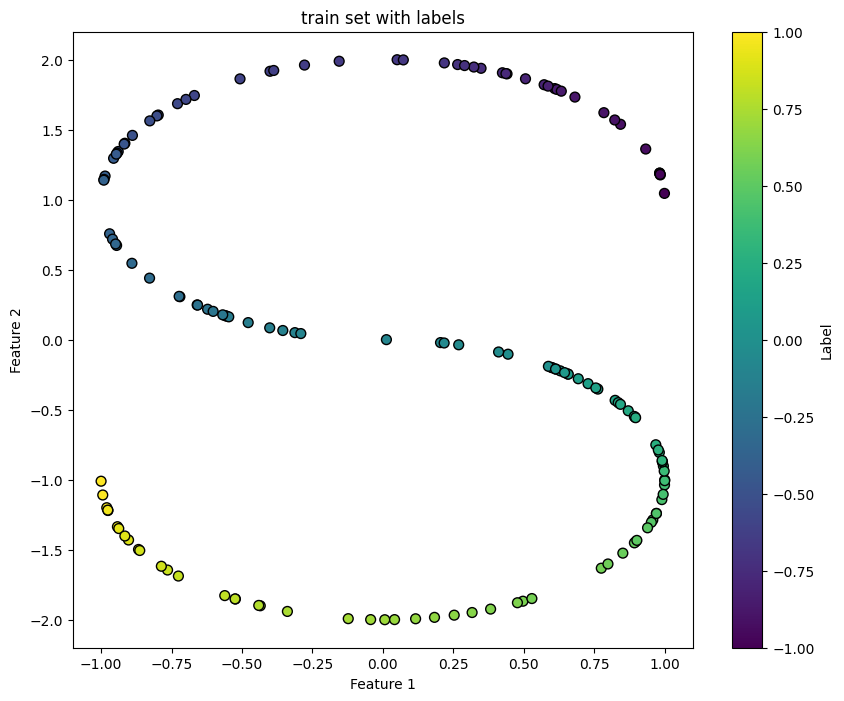

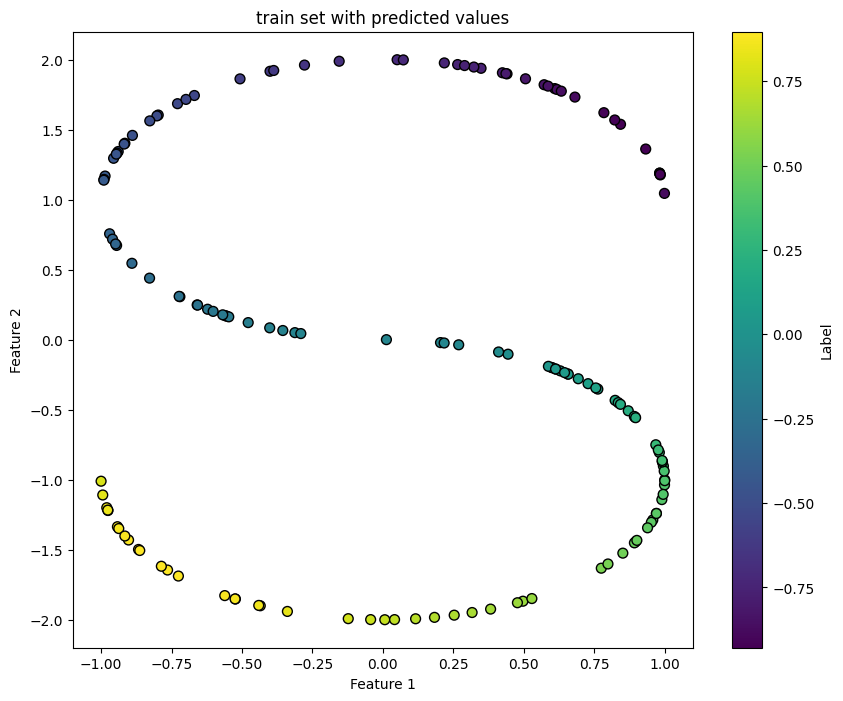

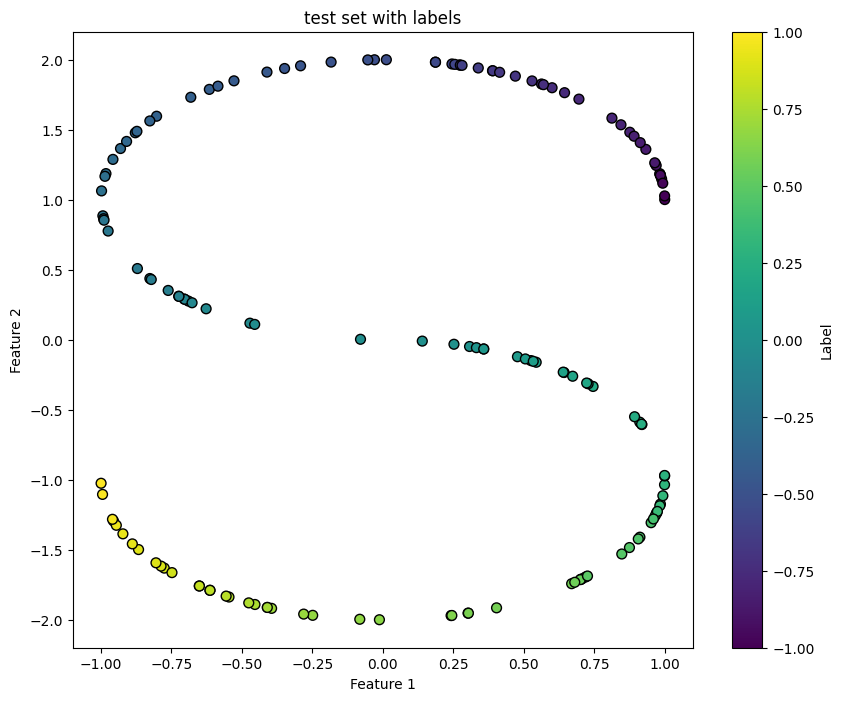

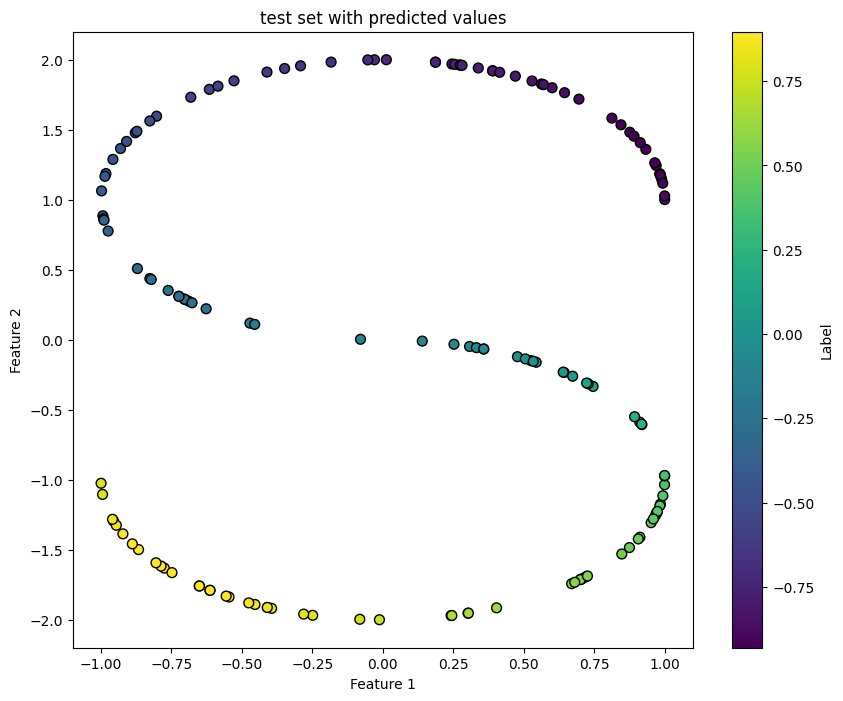

In [57]:
### Your code goes here ####

X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, model, optimizer, criterion = preprocessing(X_train, y_train, X_test, y_test)
model, epoch_loss_list = train_model(model, X_train_tensor, y_train_tensor, optimizer, criterion, num_epochs = 500) # MSE

train_rmse, test_rmse, train_pred, test_pred = evaluation(X_train_tensor, X_test_tensor, model)
print(f"MSE (train set) : {train_rmse:.3f}")
print(f"MSE (test set) : {test_rmse:.3f}\n")

plot_training_loss(epoch_loss_list)
plot_comparison(plot_s_curve, X_train, y_train, X_test, y_test, train_pred, test_pred)


In [58]:
# Brief explanation :
# Note that this is a regression problem (i.e., a single output),
# so we use the MSE loss function to minimize the differences between the labels and the predictions.
# With just 16 neurons per layer and a low number of epochs, we can still achieve high accuracy.

## EX7

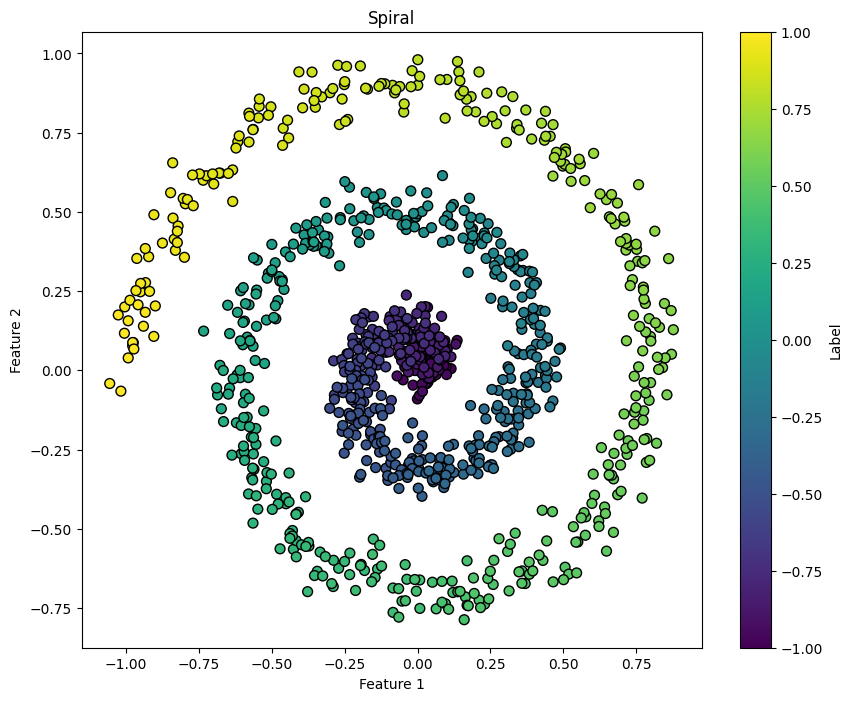

In [59]:
# Generate the data
X_train, theta_train = generate_spiral_data(random_state=0)
X_test, theta_test = generate_spiral_data(random_state=1)

# Create the labels
y_train = create_labels_spiral(theta_train)
y_test = create_labels_spiral(theta_test)

# Plot the data
plot_spiral(X_train, y_train)

MSE (train set) : 0.091
MSE (test set) : 0.097



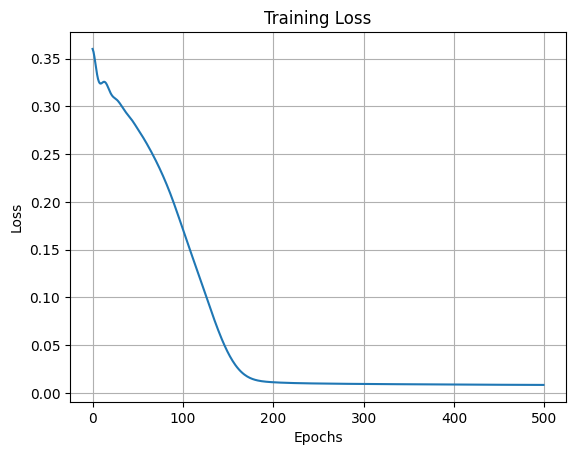

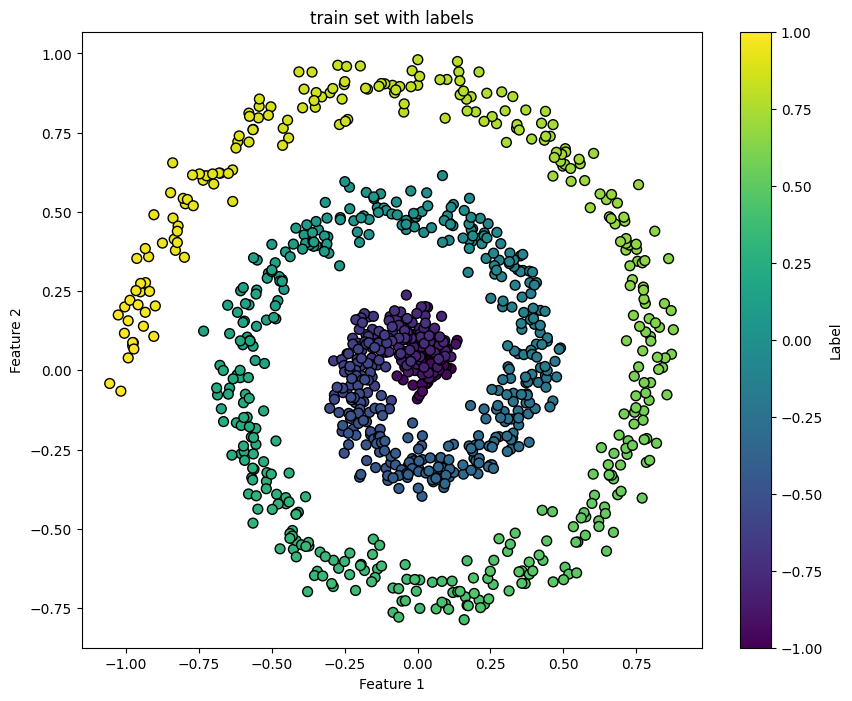

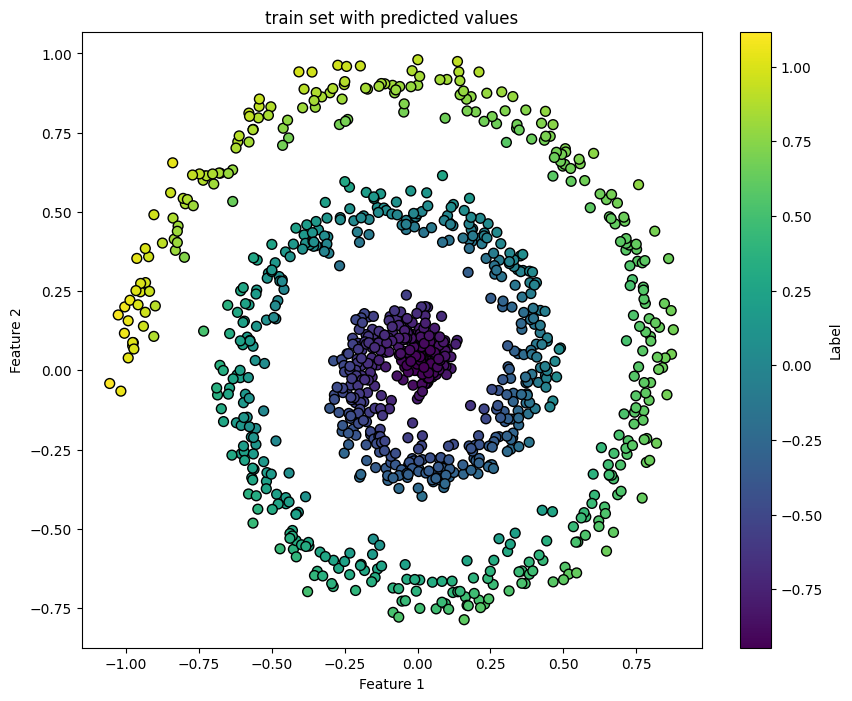

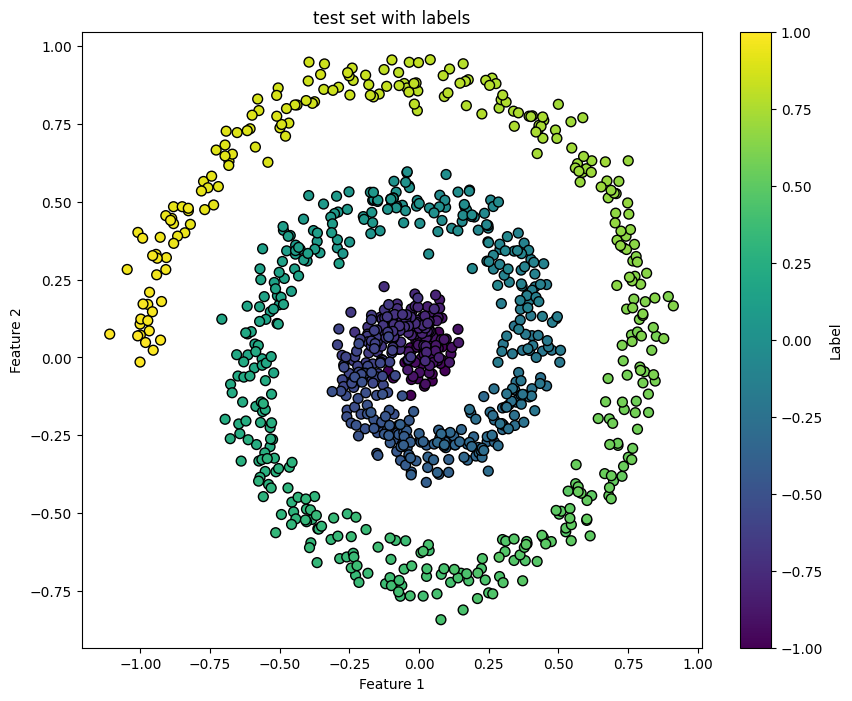

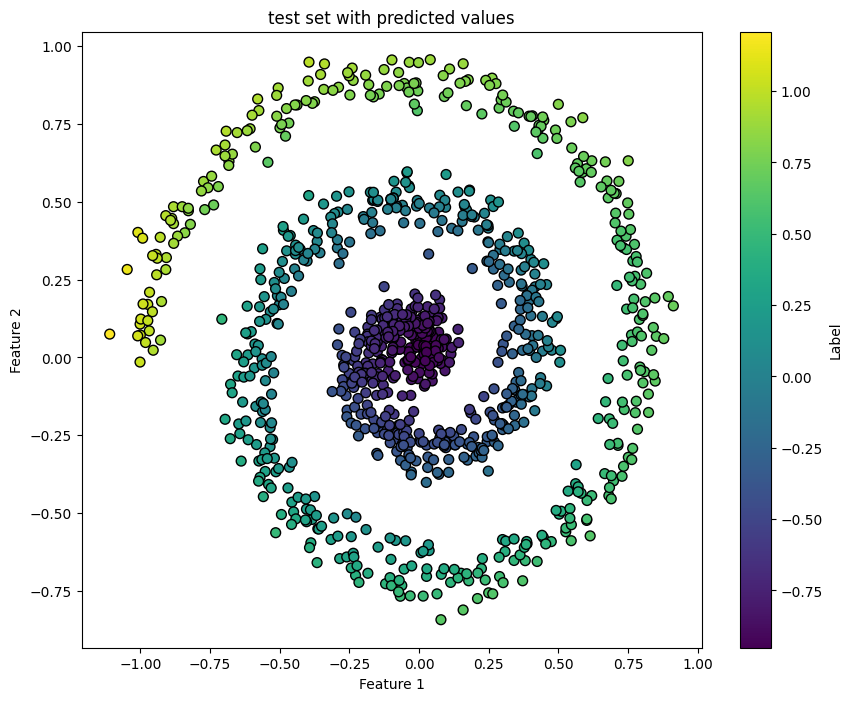

In [60]:
### Your code goes here ####

X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, model, optimizer, criterion = preprocessing(X_train, y_train, X_test, y_test)
model, epoch_loss_list = train_model(model, X_train_tensor, y_train_tensor, optimizer, criterion, num_epochs = 500) # MSE

train_rmse, test_rmse, train_pred, test_pred = evaluation(X_train_tensor, X_test_tensor, model)
print(f"MSE (train set) : {train_rmse:.3f}")
print(f"MSE (test set) : {test_rmse:.3f}\n")

plot_training_loss(epoch_loss_list)
plot_comparison(plot_spiral, X_train, y_train, X_test, y_test, train_pred, test_pred)

In [61]:
# Brief explanation :
# Similar to the previous section,
# here too, we achieve good performance with 16 neurons per layer and a low number of epochs.

## EX8

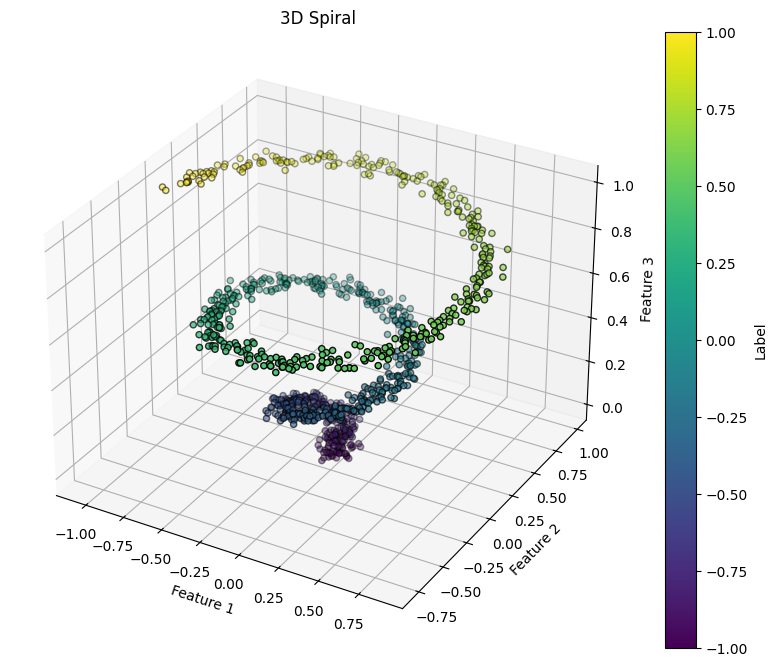

In [62]:
# Generate the data
X_train, theta_train = generate_spiral_data_3d(random_state=0)
X_test, theta_test = generate_spiral_data_3d(random_state=1)

# Create the labels
y_train = create_labels_3d_spiral(theta_train)
y_test = create_labels_3d_spiral(theta_test)

# Plot the data
plot_spiral_3d(X_train, y_train)

MSE (train set) : 0.012
MSE (test set) : 0.013



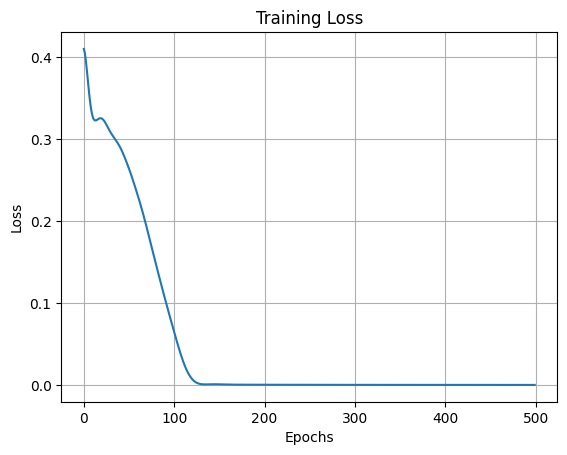

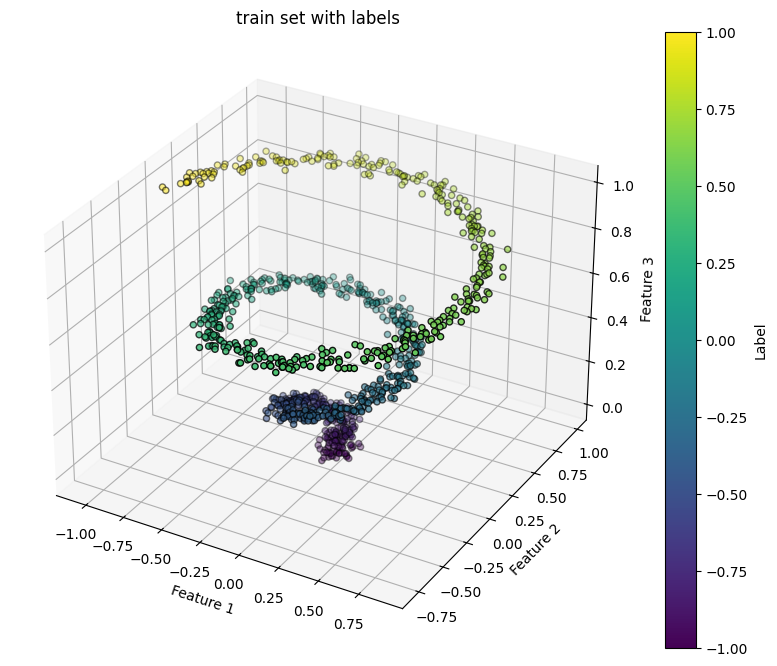

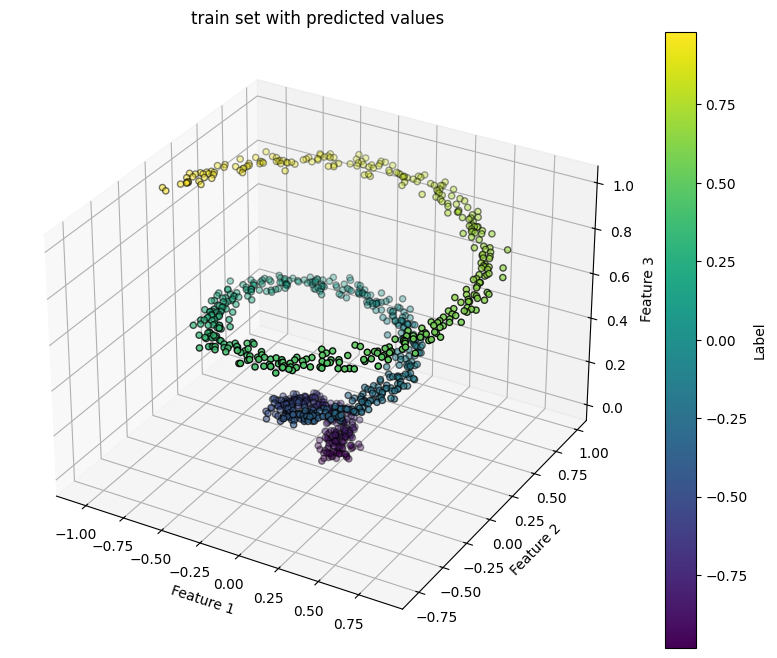

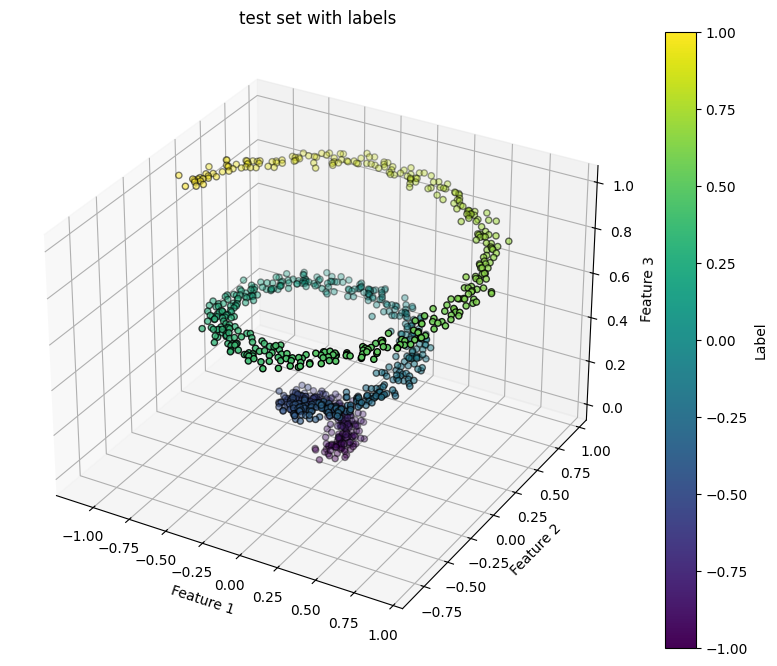

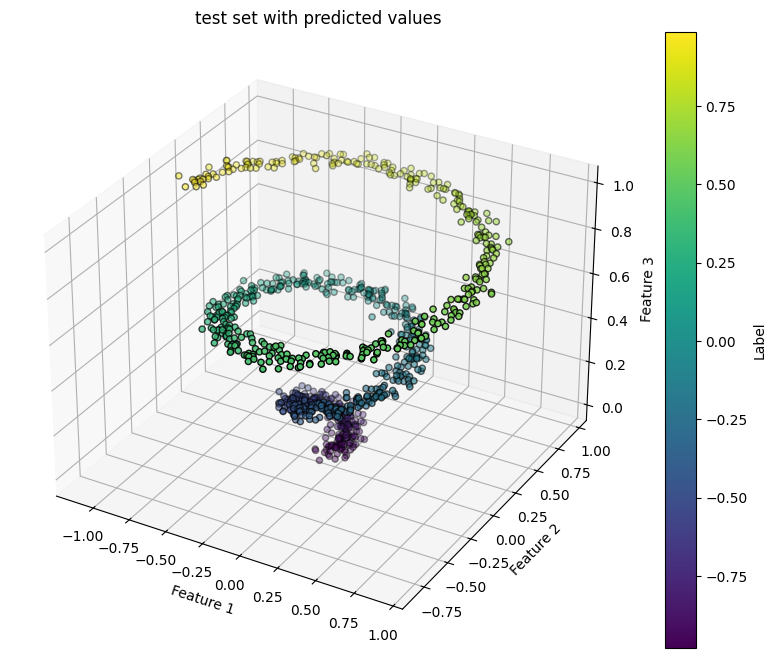

In [63]:
### Your code goes here ####

X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, model, optimizer, criterion = preprocessing(X_train, y_train, X_test, y_test)
model, epoch_loss_list = train_model(model, X_train_tensor, y_train_tensor, optimizer, criterion, num_epochs = 500) # MSE

train_rmse, test_rmse, train_pred, test_pred = evaluation(X_train_tensor, X_test_tensor, model)
print(f"MSE (train set) : {train_rmse:.3f}")
print(f"MSE (test set) : {test_rmse:.3f}\n")

plot_training_loss(epoch_loss_list)
plot_comparison(plot_spiral_3d, X_train, y_train, X_test, y_test, train_pred, test_pred)

In [64]:
# Brief explanation :
# Similar to the previous section,
# here too, we achieve good performance with 16 neurons per layer and a low number of epochs.

# MNIST Binary Classification Task (20 pts.)
## EX9
Perform a binray classification task on the MNIST dataset between two digits (you may choose any two digits).
### You are required to do the following:
1. Create a subset of the train/test sets for the two digits you have chosen
2. Create a validation set out of the train set (80%-20% split)
3. Normalize the data
4. Write a training function
5. Write an evaluation function that returns the accuracy
6. Plot the training and validation accuracy for each epoch
7. Plot 10 test images of each class with their predicited labels
8. Print the test set accuracy

### Hyperparameters:
Briefly explain why you have chosen each parameter:
1. Model: MLP, CNN (both are valid options)
2. Number of layers, number of neurons/kernels, kernel size
3. Number of epochs (between 10-100)
4. Learning rate
5. Loss function
6. Activation function

**Grading**: Correctness and discussion. You are not grade on accuracy in this section.

### Discuss the results (3-5 lines)
Did the model converge? did it overfit? How is classifying images different from the toy examples we saw? Write you overall first impressions after solving this HW.

In [65]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_mask = np.isin(y_train, [0, 1])
test_mask = np.isin(y_test, [0, 1])

x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

x_train = x_train[0:8000,:,:]
y_train = y_train[0:8000]
x_test = x_test[0:2000,:,:]
y_test = y_test[0:2000]

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(8000,28*28)
x_test = x_test.reshape(2000,28*28)

def preprocessing(X_train, y_train, X_test, y_test, hidden_size=16):

  device = "cpu"

  X_train_tensor = torch.tensor(X_train, dtype=torch.float).to(device)
  y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
  X_test_tensor = torch.tensor(X_test, dtype=torch.float).to(device)
  y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

  input_size = X_train.shape[1]
  output_size = 2

  criterion = nn.NLLLoss()
  model = MLP_Classifier(input_size, hidden_size, output_size)
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

  return X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, model, optimizer, criterion

class MLP_Classifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):

        super(MLP_Classifier, self).__init__()
        self.input = nn.Linear(input_size, hidden_size)
        self.hidden1 = nn.Linear(hidden_size, hidden_size)
        self.hidden2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):

      x = self.input(x)
      x = F.relu(x)
      x = self.hidden1(x)
      x = F.relu(x)
      x = self.hidden2(x)
      output = F.log_softmax(x, dim=1)
      return output

def train_model(model, inputs, labels, optimizer, criterion, num_epochs=100):

  model.train()
  epoch_loss_list = []

  for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(inputs).squeeze()
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    epoch_loss_list.append(loss.item())

  return model, epoch_loss_list

def evaluation(X_train_tensor, X_test_tensor, model):

  model.eval()

  with torch.no_grad():
    train_pred = torch.argmax(model(X_train_tensor), dim=1)
    test_pred = torch.argmax(model(X_test_tensor), dim=1)

  train_accruacy = accuracy_score(y_train_tensor.cpu(), train_pred.cpu())
  test_accruacy = accuracy_score(y_test_tensor.cpu(), test_pred.cpu())

  return train_accruacy, test_accruacy, train_pred, test_pred

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Training Accuracy: 0.998
Testing Accuracy: 1.000



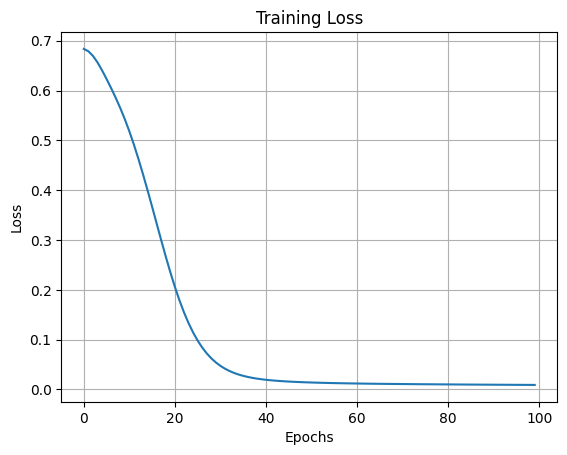

In [66]:
X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, model, optimizer, criterion = preprocessing(x_train, y_train, x_test, y_test)
model, epoch_loss_list = train_model(model, X_train_tensor, y_train_tensor, optimizer, criterion, num_epochs = 100)

train_accruacy, test_accruacy, train_pred, test_pred = evaluation(X_train_tensor, X_test_tensor, model)
print(f"Training Accuracy: {train_accruacy:.3f}")
print(f"Testing Accuracy: {test_accruacy:.3f}\n")

plot_training_loss(epoch_loss_list)

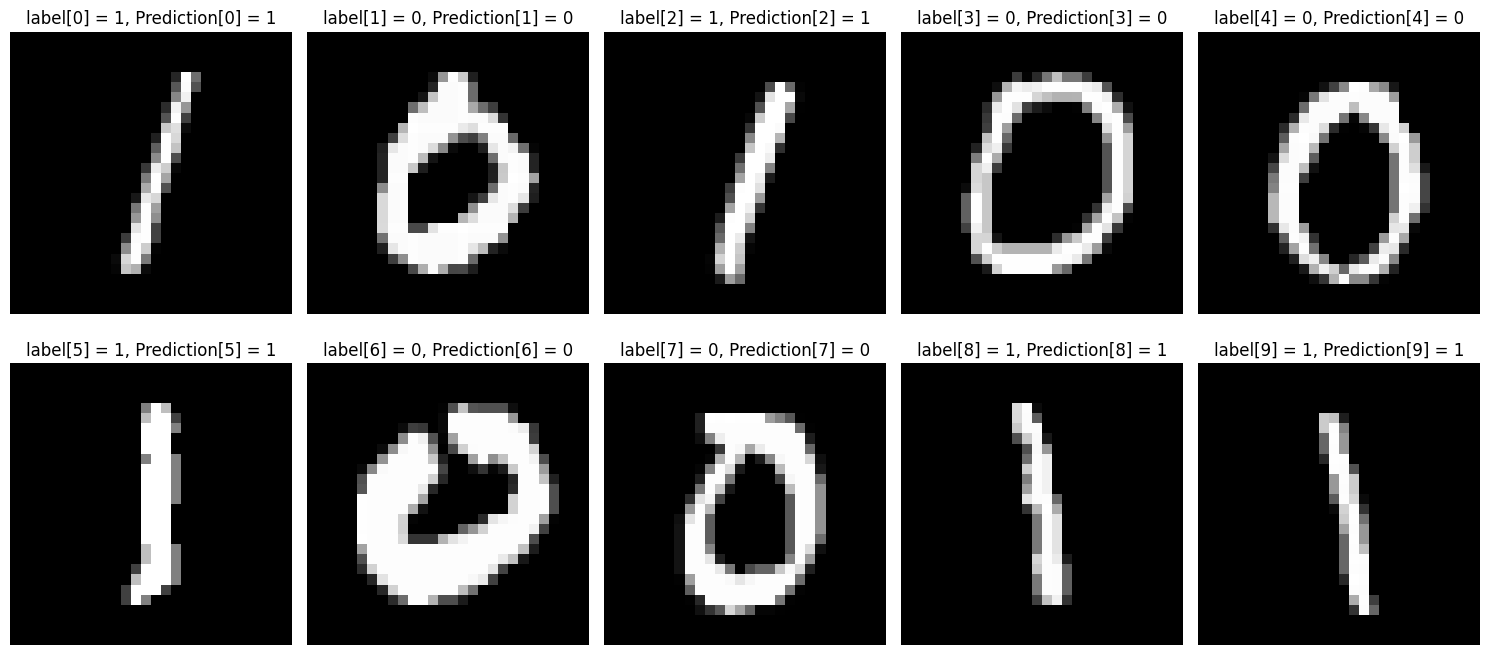

In [67]:
X_test_tensor = X_test_tensor.reshape(2000, 28, 28)
indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

plt.figure(figsize=(15, 7))
for i, index in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test_tensor[index], cmap='gray')
    plt.title(f"label[{index}] = {y_test_tensor[index]}, Prediction[{index}] = {test_pred[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [68]:
# Model:
  # MLP is Chosen due to the simplicity of the MNIST dataset and the fact that it
  # can effectively handle flattened image inputs (28x28 pixels).
  # While CNNs might be more powerful for image data,
  # MLPs are sufficient for this binary classification problem involving digits 0 and 1.

# Number of layers, number of neurons/kernels, kernel size :
  # Number of layers :
    # 2 hidden layers are used in the MLP. This adds depth to the model,
    # allowing it to capture more complex patterns in the data while keeping the architecture relatively lightweight.
  # Number of neurons/kernels :
    # The input layer corresponds to the 784 features (flattened 28x28 image).
    # The output layer has 2 neurons (binary classification).
    # Each hidden layer has 16 neurons, which provides a balance between model capacity and computational efficiency.

# Number of epochs (between 10-100) :
  # I chose 100 epochs as a starting point, as this should be enough for the model
  # to converge while avoiding overfitting.

# Learning rate :
  # I used a learning rate of 0.01 because it is a common starting point.
  # If the learning rate is too high, the model might fail to converge,
  # if it’s too low, training could become unnecessarily slow.

# Loss function :
  # I chose Negative Log Likelihood Loss (NLLLoss) because the model outputs log probabilities,
  # and NLLLoss is designed to work with such outputs in classification tasks.

# Activation function :
  # I used ReLU in the hidden layers because it’s widely used in deep learning and generally performs well.
  # ReLU introduces non-linearity into the model, allowing it to learn complex patterns in the data.